# 토큰화 된 문장의 처리

1. Pyarrow Dataset을 DataFrame으로 변환
2. Pandas를 이용한 처리
3. DataFrame을 Pyarrow Dataset으로 재변환

In [ ]:
# 코랩 사용중이라면 드라이브를 마운트합니다.
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import sys
import warnings
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
# 이미 저장된 토큰 데이터 프레임이 있다면 가져옵니다.

ROOT = '/content/drive/MyDrive/my_data/220320_kogpt/'

train_df = pd.read_csv(ROOT + 'train_s_token.csv', encoding='utf-8')

In [ ]:
# 토큰화가 완료된 pyarrow dataset을 다시 df로 변환합니다.

train_df = pd.DataFrame(train_set)
train_df.head(2)

In [ ]:
# 토큰 길이를 확인하는 열을 추가하고 저장합니다.

train_df['length'] = train_s_df['input_ids'].apply(len)

# 토큰 데이터 프레임을 csv로 저장합니다.
train_df.to_csv('/content/train_s_token.csv', index=False, encoding='utf-8')

---

### 데이터프레임으로 하고 싶은 일 수행

---

<Axes: >

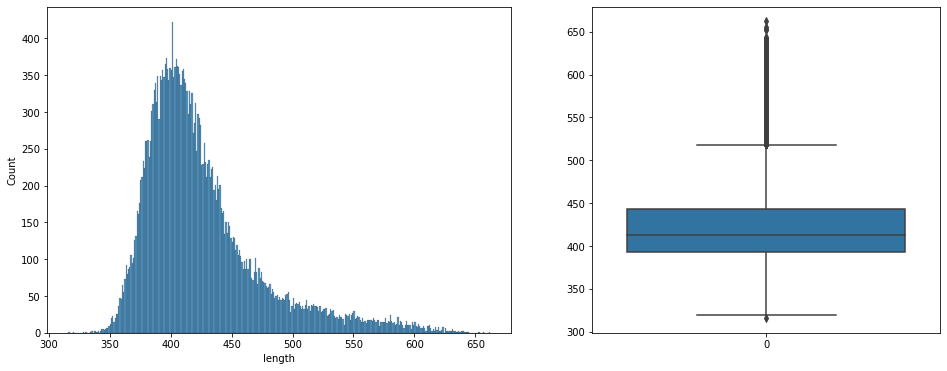

In [ ]:
# document length

fig, axs = plt.subplots(1, 2, figsize=(16, 6), gridspec_kw=dict(width_ratios=[4, 3]))
sns.histplot(train_df['length'], binwidth=1, ax=axs[0])
sns.boxplot(train_df['length'], ax=axs[1])

In [ ]:
len_total = len(train_df['length'])
len_cut = len(train_df.loc[(train_df['length'] < 420) & (train_df['length'] > 380)])

print(len_cut / len_total)

0.45155469183786784


In [ ]:
train_df_cut = train_df.loc[(train_df['length'] < 420) & (train_df['length'] > 380)]
train_df_cut.describe()

,Unnamed: 0.1,Unnamed: 0,length
count,13012.000000,13012.000000,13012.000000
mean,15697.744620,27136.675915,400.233169
std,8234.001648,8430.936518,10.781095
min,11.000000,10811.000000,381.000000
25%,8844.750000,20180.750000,391.000000
50%,16331.500000,27910.500000,400.000000
75%,22826.250000,34405.250000,409.000000
max,28815.000000,40399.000000,419.000000


In [ ]:
train_df_cut = train_df_cut.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis = 1)

In [ ]:
train_df_cut.to_csv('/content/drive/MyDrive/my_data/220320_kogpt/train_s_token_cut.csv', index=False, encoding='utf-8')

---
### 다시 토큰으로 변환하기
---

In [ ]:
# 토큰 csv 파일을 불러옵니다.

# 그냥 불러오면 object(문자열)로 가져오기 때문에 모델링 때 오류폭격을 맞습니다. 
# ast 라이브러리와 converters를 이용해 리스트로 변환하여 가져옵니다. (다소 오래 걸림)
import ast

def converter(object):
    #define format of datetime
    return ast.literal_eval(object)

converters={'input_ids': converter,
            'attention_mask' : converter,
            'labels' : converter}

train_df = pd.read_csv('/content/drive/MyDrive/my_data/220320_kogpt/train_s_cut.csv', converters=converters)

In [ ]:
# 데이터프레임을 다시 pyarrow dataset으로 변경합니다.
import datasets

train_set = datasets.Dataset.from_pandas(train_df)

In [ ]:
# 잘 변환되었는지 확인합니다. (class 'list'라고 출력되어야 함)

print(type(train_set[0]['input_ids']))